<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 4. Modeling</p>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import important cleaned data
df = pd.read_csv("data/telco_clean.csv") # replace this 
#df.sample(6).T

In [3]:
df['Churn'] = df['Churn'].apply(lambda x: x.strip().replace("Yes", "1").replace("No", "0"))
df['Churn'] = df['Churn'].astype('int') 

In [4]:
def results(y_train, y_test, prediction_train, prediction_test):
    print('-'*60)
    print('Training accuracy Score:', accuracy_score(y_train, prediction_train))
    print('Model accuracy Score:', accuracy_score(y_test, prediction_test))

    print('-'*60)
    #print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_test))
    print('Confusion Matrix:\n', pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'],margins = True))

    print('-'*60)
    print('Classification Matrix:')
    print(classification_report(y_test, prediction_test))

## Seperate x, y and make dummy vatriables 

In [5]:
df = pd.get_dummies(df)
display(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No_phone',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No_internet', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No_internet',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No_internet',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No_internet',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No_internet',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'Payment

In [6]:
# I manually droped the selected columns was to removes columns like "OnlineSecurity_No_internet" so the model results is more 
# interpretable 
df.drop(['gender_Male','Partner_Yes','Dependents_Yes','PhoneService_No','MultipleLines_No_phone',
        'InternetService_No','OnlineSecurity_No_internet','OnlineBackup_No_internet',
        'DeviceProtection_No_internet', 'TechSupport_No_internet', 'StreamingTV_No_internet',
        'StreamingMovies_No_internet', 'Contract_Two_year', 'PaperlessBilling_No', 
         'PaymentMethod_Mailed_check'], axis=1, inplace=True)
display(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month_to_month',
       'Contract_One_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer', 'PaymentMethod_Credit_card',
       'PaymentMethod_Electronic_check'],
      dtype='object')

In [7]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

## Baseline model

__which evaluation metric is most essential for this project ?__ <br>
$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} = \frac{\text{TP}}{\text{TP+FP}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} = \frac{\text{TP}}{\text{TP+FN}}$$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} = \frac{\text{TP + TN}}{\text{TP+TN+FP+FN}}  $$

0 - not churned
1 - churned.
We want to predict churned (1) as accurately as possible. So, __FN__ is bad for us. Meaning model predict not churn but the customer actually churned. Then __recall__ is the important score for us. When evaluating between models we should pay more attention to recall and try to reduce FN as much as possible.

In [8]:
# make a test-train split
from sklearn.model_selection import train_test_split
split_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=63) #stratify=y

In [9]:
# What does the split data diemention look like 
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (5274, 30)(5274,)
Test dataset: (1758, 30)(1758,)


In [10]:
#scale features 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# fit the baseline model 
#create an instance and fit the model 
logreg_base = LogisticRegression() # all default parameters
logreg_base.fit(X_train, y_train)

#predictions
prediction_train = logreg_base.predict(X_train)
prediction_test = logreg_base.predict(X_test)

# model results
results(y_train, y_test, prediction_train, prediction_test)

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------------------------------------------------------------
Training accuracy Score: 0.8100113765642776
Model accuracy Score: 0.7986348122866894
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1159  118  1277
1           236  245   481
All        1395  363  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1277
           1       0.67      0.51      0.58       481

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [12]:
'''
smote
refre to install docs 
https://imbalanced-learn.readthedocs.io/en/stable/install.html
'''
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts())

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


1    3886
0    3886
dtype: int64


In [13]:
# after SMOTE
logreg_1 = LogisticRegression()
logreg_1.fit(X_train_resampled, y_train_resampled)

#predictions
prediction_train = logreg_1.predict(X_train)
prediction_test = logreg_1.predict(X_test)

# model results
results(y_train, y_test, prediction_train, prediction_test)

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------------------------------------------------------------
Training accuracy Score: 0.7584376185058779
Model accuracy Score: 0.7463026166097838
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0           953  324  1277
1           122  359   481
All        1075  683  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1277
           1       0.53      0.75      0.62       481

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.71      1758
weighted avg       0.79      0.75      0.76      1758



Train AUC: 0.8530955539800749
Test AUC: 0.8310611376390549


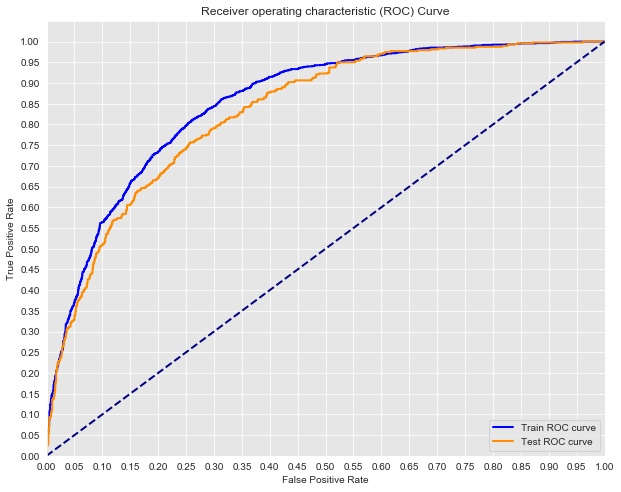

In [14]:
from sklearn.metrics import roc_curve, auc

y_score_test = logreg_1.decision_function(X_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)

y_score_train = logreg_1.decision_function(X_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

# Train AUC
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

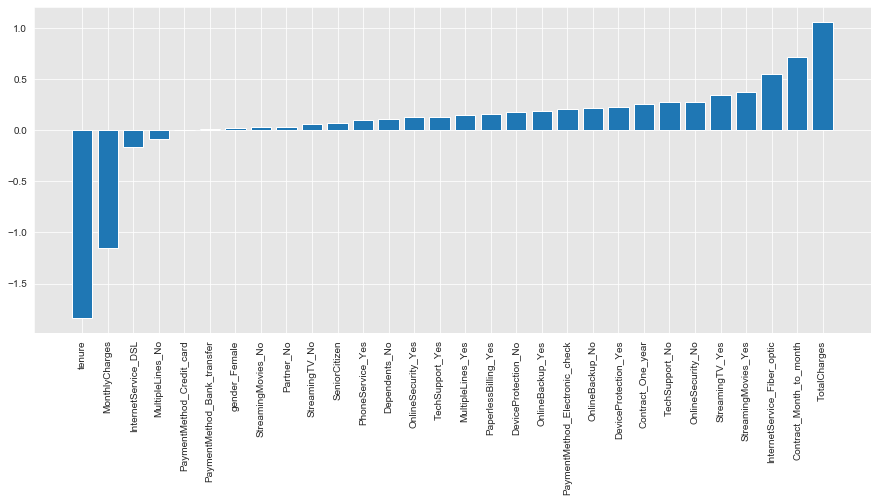

In [15]:
weights_LogReg = pd.Series(logreg_1.coef_[0], index=X.columns.values)
weights_LogReg.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(weights_LogReg.index,weights_LogReg.values)

In [16]:
'''
with tol=1e-6, max_iter=1000 increased precision added no benifit and increased calculation time. 
'''
from sklearn.metrics import recall_score
C = [100, 90, 10, 1, .1, .001, 0.0001]
for c in C:
    logmodel_tune = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    logmodel_tune.fit(X_train_resampled, y_train_resampled)
    print('C:', c)
    print('Training accuracy:', logmodel_tune.score(X_train_resampled, y_train_resampled))
    print('Test accuracy:', logmodel_tune.score(X_test, y_test))
    print('recall score : ', recall_score(y_test, logmodel_tune.predict(X_test)))
    print('')

C: 100
Training accuracy: 0.7821667524446732
Test accuracy: 0.7480091012514221
recall score :  0.7505197505197505

C: 90
Training accuracy: 0.7819094184251159
Test accuracy: 0.7468714448236633
recall score :  0.7484407484407485

C: 10
Training accuracy: 0.7821667524446732
Test accuracy: 0.7485779294653014
recall score :  0.7505197505197505

C: 1
Training accuracy: 0.7842254246011323
Test accuracy: 0.7468714448236633
recall score :  0.7484407484407485

C: 0.1
Training accuracy: 0.7822954194544519
Test accuracy: 0.745164960182025
recall score :  0.7422037422037422

C: 0.001
Training accuracy: 0.7361039629439012
Test accuracy: 0.6575654152445961
recall score :  0.8523908523908524

C: 0.0001
Training accuracy: 0.5
Test accuracy: 0.7263936291240045
recall score :  0.0



In [17]:
"""
from the hyper-parameter c optimization above 
c = 1 --> 0.001 accuracy went down from 0.75 -> 0.65 and recall increased 0.79 --> 0.88. Is this worth it ? 
"""

logreg_2 = LogisticRegression(penalty='l1', C=0.001, solver='liblinear')
logreg_2.fit(X_train_resampled, y_train_resampled)

#predictions
prediction_train = logreg_2.predict(X_train)
prediction_test = logreg_2.predict(X_test)

# model results
results(y_train, y_test, prediction_train, prediction_test)


------------------------------------------------------------
Training accuracy Score: 0.6526355707243079
Model accuracy Score: 0.6575654152445961
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1   All
Actual                   
0          746  531  1277
1           71  410   481
All        817  941  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      1277
           1       0.44      0.85      0.58       481

    accuracy                           0.66      1758
   macro avg       0.67      0.72      0.64      1758
weighted avg       0.78      0.66      0.68      1758



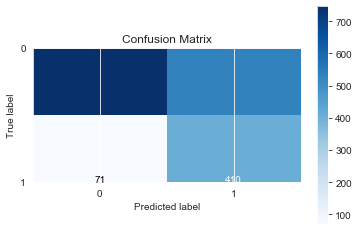

In [18]:
### Something wrong with the visualization 
import itertools

# Create the basic matrix
cnf_matrix=confusion_matrix(y_test, prediction_test)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train_resampled, y_train_resampled)
#clf = clf.fit(X_train_resampled, y_train_resampled)


#Predict the response for test dataset
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.7785362153962837
Model accuracy Score: 0.7542662116040956
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1023  254  1277
1           178  303   481
All        1201  557  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1277
           1       0.54      0.63      0.58       481

    accuracy                           0.75      1758
   macro avg       0.70      0.72      0.70      1758
weighted avg       0.77      0.75      0.76      1758



In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

col_names = list(X.columns)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('img/tree1.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## SVM

In [28]:
from sklearn.svm import SVC

clf_svm_1 = SVC(kernel='linear')
clf_svm_1.fit(X_train_resampled, y_train_resampled)

#Predict the response for test dataset
prediction_test = clf_svm_1.predict(X_test)
prediction_train = clf_svm_1.predict(X_train)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.7364429275692075
Model accuracy Score: 0.7332195676905574
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0           926  351  1277
1           118  363   481
All        1044  714  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1277
           1       0.51      0.75      0.61       481

    accuracy                           0.73      1758
   macro avg       0.70      0.74      0.70      1758
weighted avg       0.78      0.73      0.75      1758



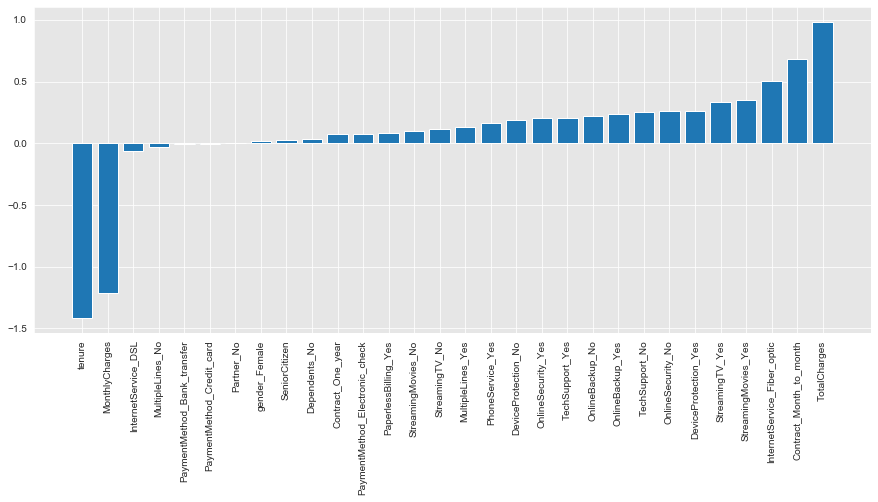

In [29]:
weights_svm = pd.Series(clf_svm_1.coef_[0], index=X.columns.values)
weights_svm.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(weights_svm.index,weights_svm.values)

## model comparison

In [38]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 

    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df

#outputs for every model
logit = LogisticRegression()
model1 = model_report(logit,X_train_resampled,X_test,y_train_resampled,y_test,
                      "Logistic Regression(Baseline_model)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,X_train_resampled,X_test,y_train_resampled,y_test,
                      "Decision Tree")
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

model5 = model_report(knn,X_train_resampled,X_test,y_train_resampled,y_test,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,X_train_resampled,X_test,y_train_resampled,y_test,
                      "Random Forest Classifier")
gnb = GaussianNB(priors=None)
model7 = model_report(gnb,X_train_resampled,X_test,y_train_resampled,y_test,
                      "Naive Bayes")
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)
model8 = model_report(svc_lin,X_train_resampled,X_test,y_train_resampled,y_test,
                      "SVM Classifier Linear")
xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)
model11 = model_report(xgc,X_train_resampled,X_test,y_train_resampled,y_test,
                      "XGBoost Classifier")

#concat all models
model_performances = pd.concat([model1,model4,model5,model6,
                                model7,model8,model11],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression(Baseline_model),0.746303,0.746362,0.525622,0.616838,0.746321
1,Decision Tree,0.740046,0.665281,0.519481,0.583409,0.716744
2,KNN Classifier,0.684869,0.669439,0.449093,0.537563,0.680060
3,Random Forest Classifier,0.765074,0.669439,0.559028,0.609272,0.735267
4,Naive Bayes,0.751422,0.708940,0.534483,0.609473,0.738182
5,SVM Classifier Linear,0.733220,0.754678,0.508403,0.607531,0.739907
6,XGBoost Classifier,0.758817,0.521830,0.564045,0.542117,0.684955


In [39]:
import plotly.graph_objs as go
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization

model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")

data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

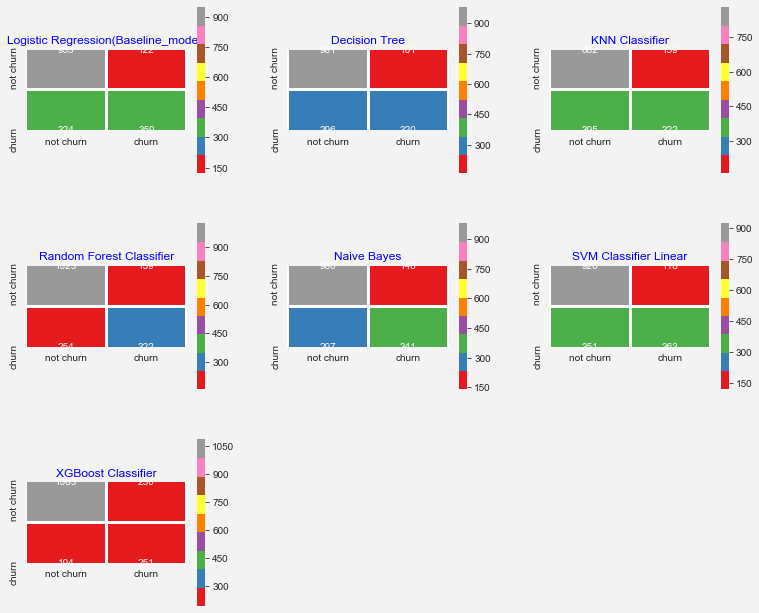

In [41]:
lst    = [logit,decision_tree,knn,rfc,
          gnb,svc_lin,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','XGBoost Classifier']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions,y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)